In [34]:
import os
from glob import glob
import shutil
import random
from matplotlib import pyplot as plt
import cv2
from glob import glob
import numpy as np

## Create train test data

In [27]:
path = '/data/sim/CTC/data/Hela/'
os.makedirs(path, exist_ok=True)

train_path = path + 'train/'
os.makedirs(train_path, exist_ok=True)
test_path = path + 'test/'
os.makedirs(test_path, exist_ok=True)
filke = open(path + 'accordings.txt', 'w')

In [28]:
in_paths = ['/data/sim/CTC/data/CTC/images/Fluo-N2DL-HeLa_01/',
            '/data/sim/CTC/data/CTC/images/Fluo-N2DL-HeLa_02/']#, '/data/sim/CTC/data/CTC/images/']
folders = []
for in_path in in_paths:
#     print(in_path, len(glob(in_path + '/*/track*')))
    folders.extend(glob(in_path + '/track*'))
    print(len(folders))
fortest = random.sample(folders, int(0.2*len(folders)))
fortrain = list(set(folders) - set(fortest))

265
939


In [29]:
print(len(fortrain), len(fortest))

752 187


In [30]:
for i, f in enumerate(fortrain):
    if len(os.listdir(f)) < 6:
        continue
    shutil.copytree(f, train_path + f'{i}')
    filke.write(f'{i}\t{f}\n')

In [31]:
for i, f in enumerate(fortest):
    if len(os.listdir(f)) < 6:
        continue
    shutil.copytree(f, test_path + f'{i}')
    filke.write(f'{i}\t{f}\n')

In [32]:
filke.close()

In [33]:
path = '/data/sim/CTC/data/Hela/train/'
for folder in os.listdir(path):
    images = os.listdir(path+folder)
    images = list(filter(lambda x: x[-3:] == 'tif', images))
    numbers = list(map(lambda x: int(x.split('crop')[-1].split('.tif')[0]), images))
    min_number = min(numbers)
    max_number = max(numbers)
    if max_number - min_number < 6:
        print('here', folder)
        os.remove(path+folder + f'/crop{min_number}.tif')
        os.remove(path+folder + f'/crop{max_number}.tif')
    else:
        os.remove(path+folder + f'/crop{min_number}.tif')
        os.remove(path+folder + f'/crop{min_number+1}.tif')
        os.remove(path+folder + f'/crop{max_number}.tif')
        os.remove(path+folder + f'/crop{max_number-1}.tif')
        print(len(os.listdir(path+folder)))

33
60
here 539
here 489
53
80
30
13
65
6
11
24
10
49
70
24
38
52
40
here 63
35
38
24
33
78
58
5
28
80
here 520
64
59
47
34
49
31
8
25
30
25
56
41
88
42
63
19
30
57
37
41
8
30
35
46
62
84
10
45
55
7
88
23
9
10
48
47
76
31
56
22
35
49
3
26
28
49
61
39
35
36
37
22
51
37
38
19
64
81
11
28
43
53
31
23
8
46
49
12
50
31
25
5
26
50
32
55
21
88
31
4
41
3
8
87
58
31
24
35
31
32
3
41
48
49
57
32
64
51
32
58
48
46
19
47
6
88
10
27
11
52
51
39
29
46
25
34
37
32
9
73
33
55
25
4
37
23
57
51
39
38
48
54
5
27
57
50
10
32
45
36
49
57
11
66
27
57
4
30
57
51
here 225
11
68
8
47
10
15
58
49
51
25
37
42
31
36
here 344
6
8
31
56
44
79
3
6
62
30
33
26
23
30
35
20
38
44
48
42
5
66
8
53
36
10
34
66
67
29
18
3
46
54
30
33
6
56
28
50
29
70
25
56
6
39
7
50
55
46
38
39
46
33
19
48
57
23
23
27
17
78
65
54
60
17
26
55
8
54
40
66
31
46
12
4
70
10
31
35
4
5
57
54
42
5
9
61
29
34
12
41
61
32
52
88
51
36
42
7
47
59
48
84
70
44
25
62
29
51
23
49
30
71
44
60
56
28
51
54
here 701
47
84
36
22
25
43
56
51
50
23
10
59
30
39
6


## Look at the data

33029 35502
136 0 135 crop15.tif


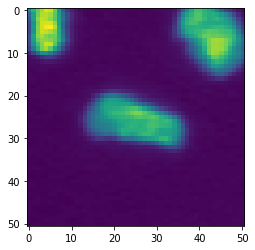

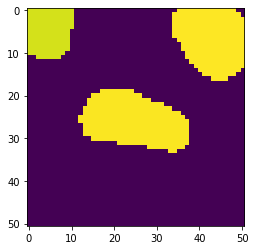

In [23]:
folder_name= 'Fluo-N2DL-HeLa_01'
im_name = 'crop87.tif'
num_track = 6
for num_track in range(135, 389):
    im_path = f'/data/sim/CTC/data/CTC/images/{folder_name}/track_{num_track}/'
    mask_path = f'/data/sim/CTC/data/CTC/masks/{folder_name}_masks/track_{num_track}/'
#     num = 0
    if not os.path.exists(f'/data/sim/CTC/data/CTC/images/{folder_name}/track_{num_track}/'):
        continue
    for im_name in os.listdir(im_path):
        img = cv2.imread(im_path + im_name, -1)
        print(img.min(), img.max())
        img = img - img.min()
        img = img / img.max()
    #     num += 1
    #     if num == 93:
    #         break

        mask = cv2.imread(mask_path + im_name, -1)
        if mask.sum() == 0:
            continue
        plt.figure()
        plt.imshow(img)
        plt.figure()
        plt.imshow(mask)
        print(mask.max(), mask.min(), num_track, im_name)
        break
    break

1.0 0.0
136 0


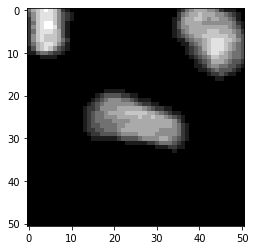

In [24]:
img = cv2.imread(im_path + im_name)
img = img - img.min()
img = img / img.max()
# img *= 255
# img = np.clip(img, 0, 255)
plt.imshow(img)
print(img.max(), img.min())
print(mask.max(), mask.min())

In [119]:
paths = glob('/data/sim/CTC/data/CTC/masks/*/*/*.tif')
for path in paths:
    mask = cv2.imread(path, -1)
    if mask.sum() == 0:
        print(path)

/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_143/crop0.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_143/crop1.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_885/crop75.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_885/crop76.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_885/crop77.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_16/crop34.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_16/crop33.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_797/crop30.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_146/crop15.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_146/crop19.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_146/crop12.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_146/crop18.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_02_masks/track_146/crop17.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeL

/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_188/crop17.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_140/crop57.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_185/crop83.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_185/crop84.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_372/crop43.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop54.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop62.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop64.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop32.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop63.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop49.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop61.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL-HeLa_01_masks/track_186/crop60.tif
/data/sim/CTC/data/CTC/masks/Fluo-N2DL

36 99
39 95
33 106
33 114
38 105
37 101
32 181
32 106
36 105
37 106
37 104
38 96
37 102
36 0 1


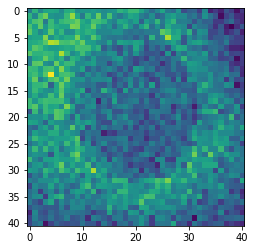

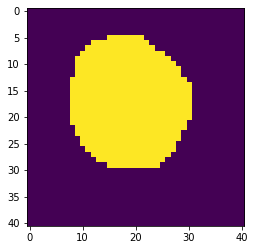

In [65]:
folder_name= 'c01'
im_name = 'crop86.tif'
num_track = 6
for num_track in range(1, 389):
    im_path = f'/data/sim/CTC/data/jpn/images/{folder_name}/track_{num_track}/'
    mask_path = f'/data/sim/CTC/data/jpn/masks/{folder_name}_masks/track_{num_track}/'
#     num = 0
    if not os.path.exists(f'/data/sim/CTC/data/jpn/images/{folder_name}/track_{num_track}/'):
        continue
    for im_name in os.listdir(im_path):
        img = cv2.imread(im_path + im_name, 0)
        print(img.min(), img.max())
        img = img - img.min()
        img = img / img.max()
    #     num += 1
    #     if num == 93:
    #         break

        mask = cv2.imread(mask_path + im_name, 0)
        if mask.sum() == 0:
            continue
        plt.figure()
        plt.imshow(img)
        plt.figure()
        plt.imshow(mask)
        print(mask.max(), mask.min(), num_track)
        
        break
    break

## Predict

In [35]:
import sys
sys.path.append('/data/sim/CTC/snapshots/Hela/src')
from src.voxelmorph2d import VoxelMorph2d

In [36]:
from torchvision import transforms
import torch
from torch import nn
from torch.nn import functional as F
import cv2
import numpy as np
use_gpu = torch.cuda.is_available()
devices = ['cpu', 'cuda']
device = devices[use_gpu]


def pad(img, padwidth):
    h0, h1, w0, w1 = padwidth[:4]
    if len(padwidth) < 5:
        img = np.pad(img, ((h0, h1), (w0, w1)))
    else:
        img = np.pad(img, ((h0, h1), (w0, w1), (0, 0)))

    return img

def normalize(im):
    im = im - im.min()
    im = im / im.max()
    return im


def predict(model_path, image_path, im_size, batch_size, save_path):
    voxelmorph = VoxelMorph2d(2)

    # voxelmorph = torch.nn.DataParallel(voxelmorph)
    # voxelmorph.to('cuda')
    voxelmorph.load_state_dict(torch.load(model_path)['model_state_dict'])

    voxelmorph.cuda()
    voxelmorph.eval()

    print("Voxelmorph loaded successfully!")

    folders = glob(image_path + '/*')
    os.makedirs(save_path, exist_ok=True)
   
    for folder in folders:
        print(folder)
        images = glob(folder + '/*.tif')
        first_path = images[0].split('crop')[0]
        nums = [int(im.split('crop')[-1].split('.')[0]) for im in images]
#         print(nums)
        if len(nums) < 2:
            continue
        else:
            os.makedirs(save_path + folder.split('/')[-1], exist_ok=True)
        for num in range(min(nums), max(nums)-1):
            im1 = cv2.imread(first_path + f'crop{num}.tif', -1)
            im2 = cv2.imread(first_path + f'crop{num+1}.tif', -1)
            fixed_image = normalize(im1.copy())
            moving_image = normalize(im2.copy())
            fixed_image = cv2.GaussianBlur(fixed_image, (5, 5), 1.2)
            moving_image = cv2.GaussianBlur(moving_image, (5, 5), 1.2)
            h, w = im1.shape[:2]
            c = min(h, w)
            fixed_image = fixed_image[:c, :c]
            moving_image = moving_image[:c, :c]
            fixed_image = cv2.resize(fixed_image, tuple(im_size[1:]))
            moving_image = cv2.resize(moving_image, tuple(im_size[1:]))
            batch_fixed = torch.Tensor(fixed_image[None, None]).float()
            batch_moving = torch.Tensor(moving_image[None, None]).float()
            if use_gpu:
                batch_fixed = batch_fixed.cuda()
                batch_moving = batch_moving.cuda()
            registered, deform, theta, _ = voxelmorph(batch_moving, batch_fixed)
           
            x = torch.Tensor(normalize(im2.copy())[None, None])
            grid = F.affine_grid(theta.cpu(), x.size())
            x = F.grid_sample(x, grid)
            im22 = np.uint8(x.detach().cpu().numpy().copy()[0, 0]*255)
            
            deform = deform.detach().cpu().numpy().transpose((0,2,3,1))[0]
#             print(deform.shape)
            deform = cv2.resize(deform, (c, c))
            deform = pad(deform, [0, h-c, 0, w-c, 0, 0])
            deform = torch.Tensor(deform[None]).permute(0,3,1,2)
#             print(im1.shape, deform.shape)
            tmp = torch.Tensor(x).float()
            if use_gpu:
                tmp = tmp.cuda()
                deform = deform.cuda()
            registered = voxelmorph.spatial_transform(tmp, deform)
            registered = registered.detach().cpu().numpy().squeeze()
#             registered = cv2.resize(registered, (c, c))
#             registered = pad(registered, [0, h-c, 0, w-c])
            
#             im2 = normalize(im2)*255
#             plt.figure()
#             plt.imshow(im2)
#             im11 = cv2.warpAffine(im1, theta_fixed, (w, h))
#             plt.figure()
#             plt.imshow(im11)
#             im_zero = np.zeros_like(im1)
#             im = np.stack([im2, im11, im_zero], axis=-1)
#             plt.figure()
#             plt.imshow(np.uint8(im))        

#             break
            im1 = np.uint8(normalize(im1)[None]*255)
            im2 = np.uint8(normalize(im2)[None]*255)
            im3 = (registered * 255).astype('uint8')[None]
            im_zero = np.zeros_like(im3)
            im = np.concatenate([im1, im2, im_zero], axis=0).transpose((1, 2, 0))
            imm = np.concatenate([im1, im22[None], im_zero], axis=0).transpose((1, 2, 0))
            imp = np.concatenate([im1, im3, im_zero], axis=0).transpose((1, 2, 0))
            im = np.concatenate([im, imm, imp], axis=1 )
            io.imsave(save_path + '/' + folder.split('/')[-1] + f'/{num+1}.jpg', im)
#         break


def predict_seq(model_path, image_path, im_size, batch_size, save_path):
    voxelmorph = VoxelMorph2d(2)

    # voxelmorph = torch.nn.DataParallel(voxelmorph)
    # voxelmorph.to('cuda')
    voxelmorph.load_state_dict(torch.load(model_path)['model_state_dict'])

    voxelmorph.cuda()
    voxelmorph.eval()

    print("Voxelmorph loaded successfully!")

    folders = glob(image_path + '/*')
    os.makedirs(save_path, exist_ok=True)
   
    for folder in folders:
        print(folder)
        images = glob(folder + '/*.tif')
        first_path = images[0].split('crop')[0]
        nums = [int(im.split('crop')[-1].split('.')[0]) for im in images]
#         print(nums)
        if len(nums) < 3:
            continue
        else:
            os.makedirs(save_path + folder.split('/')[-1], exist_ok=True)
        seq = []
        for num in range(min(nums)+1, max(nums)):
            im = cv2.imread(first_path + f'crop{num}.tif', -1)
            seq.append(im)
#             print(im.dtype, im.max())
        al_seq = normalize(seq[0].copy())[None]*255
        deforms = []
        thetas = []
        
        tmp = seq[0].copy()
        fixed_image = normalize(tmp.copy())
#         fixed_image = cv2.GaussianBlur(fixed_image, (5, 5), 1.2)
        h, w = tmp.shape[:2]
        c = min(h, w)
        fixed_image = fixed_image[:c, :c]
        fixed_image = cv2.resize(fixed_image, tuple(im_size[1:]))
        batch_fixed = torch.Tensor(fixed_image[None, None]).float()
        fixies = [batch_fixed]
        pred = tmp
#         pred = fixed_image
        for i in range(1, len(seq)):
#             im1 = seq[i-1]
            im1 = pred
            im2 = seq[i]
#             im2 = cv2.imread(first_path + f'crop{num+1}.tif', 0)
#             fixed_image = normalize(im1.copy())
            moving_image = normalize(im2.copy())
#             fixed_image = cv2.GaussianBlur(fixed_image, (5, 5), 1.2)
#             moving_image = cv2.GaussianBlur(moving_image, (5, 5), 1.2)
            h, w = im2.shape[:2]
            c = min(h, w)
#             fixed_image = fixed_image[:c, :c]
            moving_image = moving_image[:c, :c]
#             fixed_image = cv2.resize(fixed_image, tuple(im_size[1:]))
            moving_image = cv2.resize(moving_image, tuple(im_size[1:]))
#             im2 = moving_image
#             batch_fixed = torch.Tensor(fixed_image[None, None]).float()
            batch_moving = torch.Tensor(moving_image[None, None]).float()
            batch_fixed = fixies[i-1]
            if use_gpu:
                batch_fixed = batch_fixed.cuda()
                batch_moving = batch_moving.cuda()
            registered, deform, theta, _ = voxelmorph(batch_moving, batch_fixed)
            fixies.append(registered.detach().cpu())
            x = torch.Tensor(normalize(im2.copy())[None, None])
            grid = F.affine_grid(theta.cpu(), x.size())
            x = F.grid_sample(x, grid)
            im22 = np.uint8(x.detach().cpu().numpy().copy()[0, 0]*255)
            
            deform = deform.detach().cpu().numpy().transpose((0,2,3,1))[0]
#             print(deform.shape)
#             print(h-c, w-c)
            deform = cv2.resize(deform, (c, c))
            deform = pad(deform, [0, h-c, 0, w-c, 0, 0])
            deform = torch.Tensor(deform[None]).permute(0,3,1,2)
            deforms.append(deform)
            thetas.append(theta.cpu())
#             print(im1.shape, deform.shape)
            tmp = x.float()
            if use_gpu:
                tmp = tmp.cuda()
                deform = deform.cuda()
            registered = voxelmorph.spatial_transform(tmp, deform)
            pred = registered.detach().cpu().numpy().squeeze()
            
#             for deform, theta in zip(deforms[:-1:-1], thetas[:-1:-1]):
#                     x = registered
#                     grid = F.affine_grid(theta, x.size())
#                     x = F.grid_sample(x, grid)
#                     if use_gpu:
# #                         registered = registered.cuda()
#                         deform = deform.cuda()
#                     registered = voxelmorph.spatial_transform(registered, deform)
            registered = registered.detach().cpu().numpy().squeeze()
            h, w = seq[0].shape[:2]
            al_seq = np.concatenate([al_seq, cv2.resize(np.uint8(registered*255), (w, h))[None]], axis=0)
        
#             registered = cv2.resize(registered, (c, c))
#             registered = pad(registered, [0, h-c, 0, w-c])
            
#             im2 = normalize(im2)*255
#             plt.figure()
#             plt.imshow(im2)
#             im11 = cv2.warpAffine(im1, theta_fixed, (w, h))
#             plt.figure()
#             plt.imshow(im11)
#             im_zero = np.zeros_like(im1)
#             im = np.stack([im2, im11, im_zero], axis=-1)
#             plt.figure()
#             plt.imshow(np.uint8(im))        

#             break
            h, w = min(im1.shape[0], im2.shape[0]), min(im1.shape[1], im2.shape[1])
            im1 = cv2.resize(im1,(w, h))
            im2 = cv2.resize(im2,(w, h))
            pred = cv2.resize(pred,(w, h))
            im22 = cv2.resize(im22, (w, h))
            im1 = np.uint8(normalize(im1)[None]*255)
            im2 = np.uint8(normalize(im2)[None]*255)
            im3 = (pred * 255).astype('uint8')[None]
            im_zero = np.zeros_like(im3)
#             print(im1.shape, im2.shape, im3.shape, im22.shape, im.shape)
            im = np.concatenate([im1, im2, im_zero], axis=0).transpose((1, 2, 0))
            imm = np.concatenate([im1, im22[None], im_zero], axis=0).transpose((1, 2, 0))
            imp = np.concatenate([im1, im3, im_zero], axis=0).transpose((1, 2, 0))
            im = np.concatenate([im, imm, imp], axis=1 )
            io.imsave(save_path + '/' + folder.split('/')[-1] + f'/{i}.jpg', im)
#         break

        io.imsave(save_path + '/' + folder.split('/')[-1] + f'/seq.tif', al_seq.astype('uint8'))
        del al_seq
        al_seq = normalize(seq[0].copy())[None]*255
        for i in range(1, len(seq)):
            im1 = seq[0]
            im2 = seq[i]
            fixed_image = normalize(im1.copy())
            moving_image = normalize(im2.copy())
            fixed_image = cv2.GaussianBlur(fixed_image, (3, 3), 1.2)
            moving_image = cv2.GaussianBlur(moving_image, (3, 3), 1.2)
            h, w = im1.shape[:2]
            c = min(h, w)
            fixed_image = fixed_image[:c, :c]
            moving_image = moving_image[:c, :c]
            fixed_image = cv2.resize(fixed_image, tuple(im_size[1:]))
            moving_image = cv2.resize(moving_image, tuple(im_size[1:]))
            batch_fixed = torch.Tensor(fixed_image[None, None]).float()
            batch_moving = torch.Tensor(moving_image[None, None]).float()
            if use_gpu:
                batch_fixed = batch_fixed.cuda()
                batch_moving = batch_moving.cuda()
            registered, deform, theta, _ = voxelmorph(batch_moving, batch_fixed)
           
            x = torch.Tensor(normalize(im2.copy())[None, None])
            grid = F.affine_grid(theta.cpu(), x.size())
            x = F.grid_sample(x, grid)
            im22 = np.uint8(x.detach().cpu().numpy().copy()[0, 0]*255)
            
            deform = deform.detach().cpu().numpy().transpose((0,2,3,1))[0]
#             print(deform.shape)
            deform = cv2.resize(deform, (c, c))
            deform = pad(deform, [0, h-c, 0, w-c, 0, 0])
            deform = torch.Tensor(deform[None]).permute(0,3,1,2)
            tmp = torch.Tensor(x).float()
            if use_gpu:
                tmp = tmp.cuda()
                deform = deform.cuda()
            registered = voxelmorph.spatial_transform(tmp, deform)
            registered = registered.detach().cpu().numpy().squeeze()
            al_seq = np.concatenate([al_seq, np.uint8(registered*255)[None]], axis=0)

#             im1 = np.uint8(normalize(im1)[None]*255)
#             im2 = np.uint8(normalize(im2)[None]*255)
#             im3 = (registered * 255).astype('uint8')[None]
#             im_zero = np.zeros_like(im3)
#             im = np.concatenate([im1, im2, im_zero], axis=0).transpose((1, 2, 0))
#             imm = np.concatenate([im1, im22[None], im_zero], axis=0).transpose((1, 2, 0))
#             imp = np.concatenate([im1, im3, im_zero], axis=0).transpose((1, 2, 0))
#             im = np.concatenate([im, imm, imp], axis=1 )
#             io.imsave(save_path + '/' + folder.split('/')[-1] + f'/{i}.jpg', im)
#         break

        io.imsave(save_path + '/' + folder.split('/')[-1] + f'/seq_w0.tif', al_seq.astype('uint8'))

In [40]:
from skimage import io
name = 'Hela'
predict_seq(f'/data/sim/CTC/snapshots/{name}/vmbest_405',
        '/data/sim/CTC/data/Hela/test/', (2, 128, 128),
        1, f'/data/sim/CTC/result/Hela/')

Voxelmorph loaded successfully!
/data/sim/CTC/data/Hela/test/50
/data/sim/CTC/data/Hela/test/101
/data/sim/CTC/data/Hela/test/65
/data/sim/CTC/data/Hela/test/134
/data/sim/CTC/data/Hela/test/63
/data/sim/CTC/data/Hela/test/108
/data/sim/CTC/data/Hela/test/26
/data/sim/CTC/data/Hela/test/186
/data/sim/CTC/data/Hela/test/127
/data/sim/CTC/data/Hela/test/123
/data/sim/CTC/data/Hela/test/95
/data/sim/CTC/data/Hela/test/90
/data/sim/CTC/data/Hela/test/49
/data/sim/CTC/data/Hela/test/185
/data/sim/CTC/data/Hela/test/84
/data/sim/CTC/data/Hela/test/68
/data/sim/CTC/data/Hela/test/124
/data/sim/CTC/data/Hela/test/170
/data/sim/CTC/data/Hela/test/4
/data/sim/CTC/data/Hela/test/122
/data/sim/CTC/data/Hela/test/135


/home/nadya/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:247: UserWarning: /data/sim/CTC/result/Hela//135/13.jpg is a low contrast image


/data/sim/CTC/data/Hela/test/167
/data/sim/CTC/data/Hela/test/66
/data/sim/CTC/data/Hela/test/41
/data/sim/CTC/data/Hela/test/30
/data/sim/CTC/data/Hela/test/98
/data/sim/CTC/data/Hela/test/36
/data/sim/CTC/data/Hela/test/180
/data/sim/CTC/data/Hela/test/35
/data/sim/CTC/data/Hela/test/103
/data/sim/CTC/data/Hela/test/116
/data/sim/CTC/data/Hela/test/3
/data/sim/CTC/data/Hela/test/164
/data/sim/CTC/data/Hela/test/176
/data/sim/CTC/data/Hela/test/39
/data/sim/CTC/data/Hela/test/128
/data/sim/CTC/data/Hela/test/88
/data/sim/CTC/data/Hela/test/155
/data/sim/CTC/data/Hela/test/67
/data/sim/CTC/data/Hela/test/179
/data/sim/CTC/data/Hela/test/54
/data/sim/CTC/data/Hela/test/6
/data/sim/CTC/data/Hela/test/107
/data/sim/CTC/data/Hela/test/105
/data/sim/CTC/data/Hela/test/153
/data/sim/CTC/data/Hela/test/29
/data/sim/CTC/data/Hela/test/0
/data/sim/CTC/data/Hela/test/150
/data/sim/CTC/data/Hela/test/71
/data/sim/CTC/data/Hela/test/171
/data/sim/CTC/data/Hela/test/5
/data/sim/CTC/data/Hela/test/1

## Masks from deformations

In [13]:
import os

name = 'GOWT'
model_path = f'/data/sim/CTC/snapshots/{name}/vm_380'
print(os.path.exists(model_path))
data_path = '/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/'
masks_path = '/data/sim/CTC/data/CTC/masks/Fluo-N2DH-GOWT1_02_masks/'
im_size = (128, 128)

True


In [14]:
from torchvision import transforms
import torch
import cv2
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

use_gpu = torch.cuda.is_available()
devices = ['cpu', 'cuda']
device = devices[use_gpu]


def pad(img, padwidth):
    h0, h1, w0, w1 = padwidth[:4]
    if len(padwidth) < 5:
        img = np.pad(img, ((h0, h1), (w0, w1)))
    else:
        img = np.pad(img, ((h0, h1), (w0, w1), (0, 0)))

    return img

def normalize(im):
    im = im - im.min()
    im = im / im.max()
    return im


voxelmorph = VoxelMorph2d(2)

voxelmorph.load_state_dict(torch.load(model_path)['model_state_dict'])

voxelmorph.cuda()
voxelmorph.eval()

print("Voxelmorph loaded successfully!")

Voxelmorph loaded successfully!


In [111]:
def get_mask_fwd(image, nearest_im, nearest_mask):
    inh, inw = image.shape[:2]
    ###Preprocessing
    moving_image = normalize(nearest_im.copy())
    fixed_image = normalize(image.copy())
#     fixed_image = cv2.GaussianBlur(fixed_image, (5, 5), 1.2)
#     moving_image = cv2.GaussianBlur(moving_image, (5, 5), 1.2)
    h, w = fixed_image.shape[:2]
    c = min(h, w)
    fixed_image = fixed_image[:c, :c]
    moving_image = moving_image[:c, :c]
    fixed_image = cv2.resize(fixed_image, im_size)
    moving_image = cv2.resize(moving_image, im_size)
    batch_fixed = torch.Tensor(fixed_image[None, None]).float()
    batch_moving = torch.Tensor(moving_image[None, None]).float()
    if use_gpu:
        batch_fixed = batch_fixed.cuda()
        batch_moving = batch_moving.cuda()
    ###Inference
    _, deform, theta, _ = voxelmorph(batch_moving, batch_fixed)
    ###Postprocessing
    x = torch.Tensor(normalize(nearest_mask.copy())[None, None])
    grid = F.affine_grid(theta.cpu(), x.size())
    x = F.grid_sample(x, grid)
    deform = deform.detach().cpu().numpy().transpose((0,2,3,1))[0]
#             print(deform.shape)
    deform = cv2.resize(deform, (c, c))
    deform = pad(deform, [0, h-c, 0, w-c, 0, 0])
    deform = cv2.GaussianBlur(deform, (31, 31), 10)
    deform = torch.Tensor(deform[None]).permute(0,3,1,2)
#             print(im1.shape, deform.shape)
    tmp = x.float()
    if use_gpu:
        tmp = tmp.cuda()
        deform = deform.cuda()
    mask = voxelmorph.spatial_transform(tmp, deform)
    mask = mask.detach().cpu().numpy().squeeze() > 0
    mask = mask.astype('uint8')
#                 mask = cv2.GaussianBlur(mask, (3,3), 2.2)
#                 mask = mask.astype('uint8')
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
#     opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#     mask = cv2.erode(opening, kernel)
    return mask

def get_mask_bcw(image, nearest_im, nearest_mask):
    inh, inw = image.shape[:2]
    ###Preprocessing
    fixed_image = normalize(nearest_im.copy())
    moving_image = normalize(image.copy())
    fixed_image = cv2.GaussianBlur(fixed_image, (5, 5), 1.2)
    moving_image = cv2.GaussianBlur(moving_image, (5, 5), 1.2)
    h, w = fixed_image.shape[:2]
    c = min(h, w)
    fixed_image = fixed_image[:c, :c]
    moving_image = moving_image[:c, :c]
    fixed_image = cv2.resize(fixed_image, im_size)
    moving_image = cv2.resize(moving_image, im_size)
    batch_fixed = torch.Tensor(fixed_image[None, None]).float()
    batch_moving = torch.Tensor(moving_image[None, None]).float()
    if use_gpu:
        batch_fixed = batch_fixed.cuda()
        batch_moving = batch_moving.cuda()
    ###Inference
    _, deform, theta, _ = voxelmorph(batch_moving, batch_fixed)
    ###Postprocessing
    x = torch.Tensor(normalize(nearest_mask.copy())[None, None])
    grid = F.affine_grid(theta.cpu(), x.size())
    x = F.grid_sample(x, grid)
#                 im22 = np.uint8(x.detach().cpu().numpy().copy())
    deform = deform.detach().cpu().numpy().transpose((0,2,3,1))[0]
#             print(deform.shape)
    deform = cv2.resize(deform, (c, c))
    deform = pad(deform, [0, h-c, 0, w-c, 0, 0])
    mask_dots = np.where(nearest_mask > 0)
    mask_dots = np.array(list(zip(mask_dots[1], mask_dots[0])))
#                 print(mask_dots.shape, deform.shape)
    mask_dots = ffRemap.dots_remap_bcw(mask_dots, deform, num=200)
    mask = np.zeros_like(nearest_mask)
    for x, y in np.floor(mask_dots).astype('int'):
        mask[y, x] = 1
    for x, y in np.ceil(mask_dots).astype('int'):
        mask[y, x] = 1
    mask = mask.astype('uint8')
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    erosion = cv2.erode(opening, kernel)
    opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    mask = cv2.dilate(opening, kernel, iterations=2)
    return mask

def iou(mask1, mask2):
    mask1 = (mask1>0).astype('uint8')
    mask2 = (mask2>0).astype('uint8')
    inter = mask1*mask2
    union = mask1 + mask2 - inter
    return inter.sum() / union.sum()


from scipy.ndimage import distance_transform_edt
def make_circular(mask):
    mask = mask > 0
    dist = di

31.622776601683793


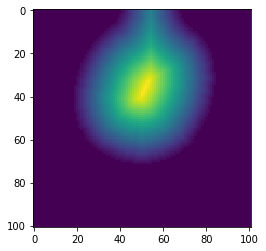

In [131]:
plt.imshow(mask2)

mask = mask2.copy()
mask = mask > 0
dist = distance_transform_edt(mask)
# dist = dist.max() - dist
mean_val = (dist[dist > 0]).mean()
# dist[dist < mean_val] = 0
plt.imshow(dist)
print(dist.max())

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_33


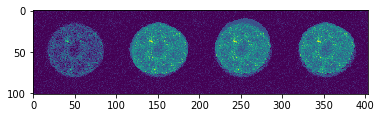

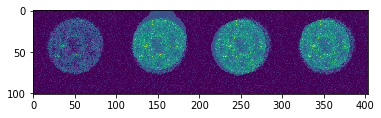

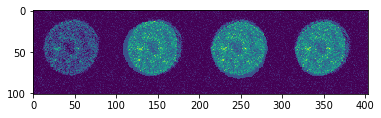

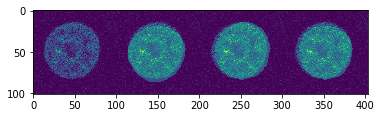

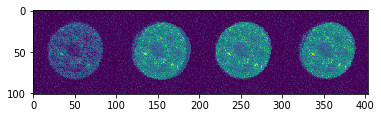

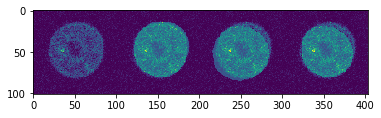

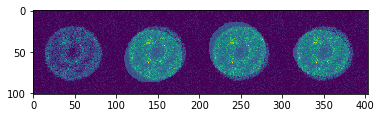

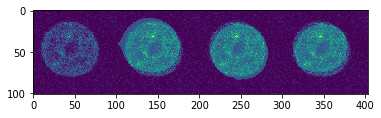

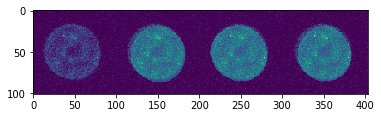

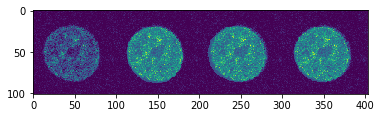

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_63


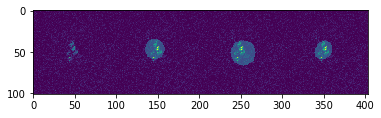

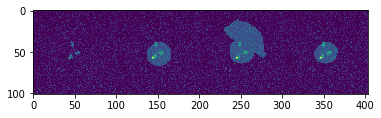

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_7


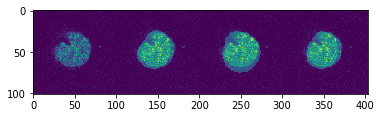

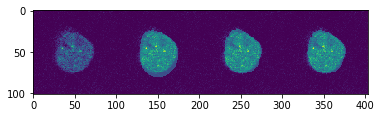

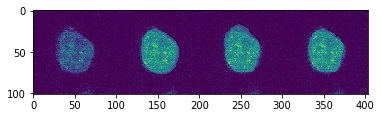

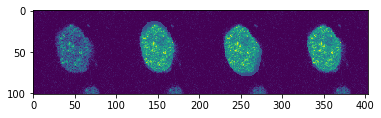

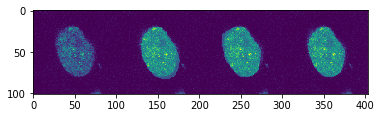

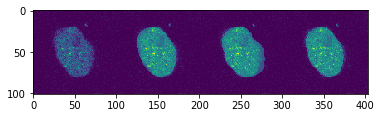

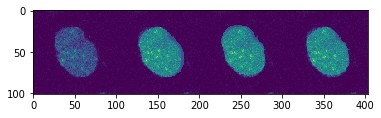

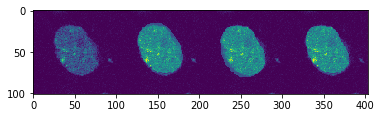

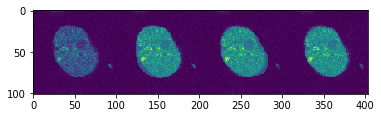

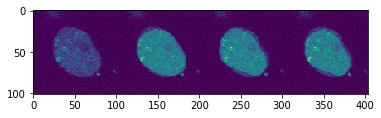

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_16


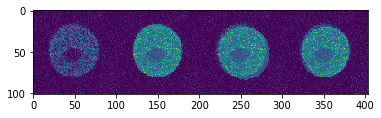

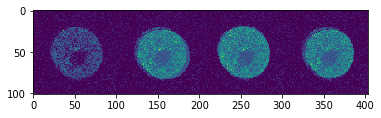

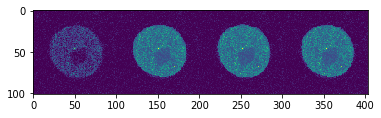

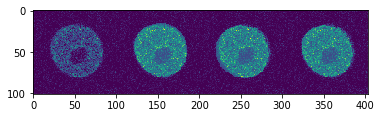

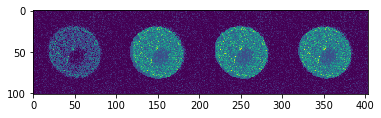

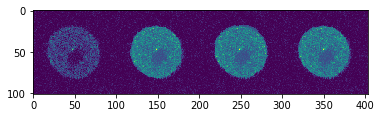

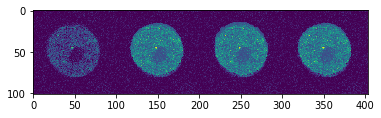

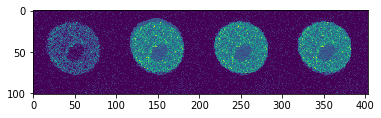

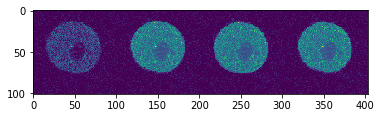

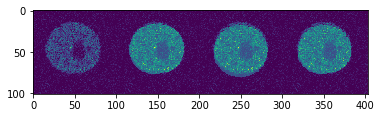

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_61


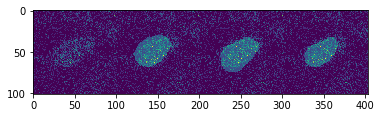

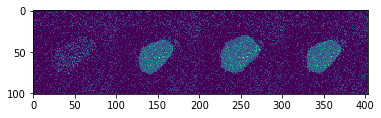

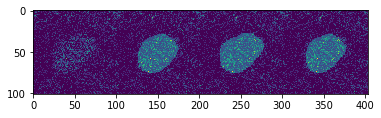

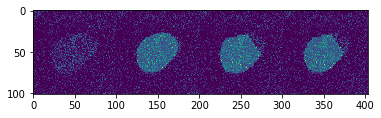

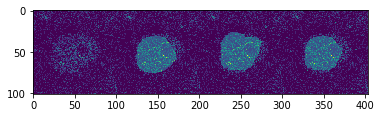

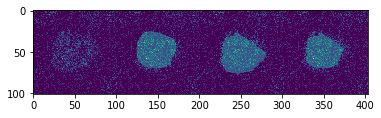

MINIMAX IOU IS 0.31192161132280893 0.9588072548416846 0.7963402868218384


In [139]:
folders = glob(data_path + '/*')
# os.makedirs(save_path, exist_ok=True)
miniou = 1
maxiou = 0
meaniou = 0
iou_num = 0
for folder in folders[:5]:
    print(folder)
    mask_number = int(folder.split('_')[-1])
    images = glob(folder + '/*.tif')
    image_path = images[0].split('crop')[0]
    mask_path = image_path.replace(data_path, masks_path)
    nums = [int(im.split('crop')[-1].split('.')[0]) for im in images]
#     print(nums)
#     input()
    if len(nums) < 2:
        continue
#     else:
#         os.makedirs(save_path + folder.split('/')[-1], exist_ok=True)
    nearest_im = None
    nearest_mask = None
    masks_before = []
    
    
    for num in range(min(nums)+1, min(max(nums)-1, min(nums)+12)):
        image = cv2.imread(image_path + f'crop{num}.tif', -1)
        mask = cv2.imread(mask_path + f'crop{num+1}.tif', -1) == mask_number
        mask = mask.astype('uint8')
        if mask.sum() == 0:
#             print('tut', nearest_mask)
            if nearest_mask is None:
                masks_before.append((num, image))
            else:
                mask = get_mask_fwd(image, nearest_im, nearest_mask)
                mask = cv2.GaussianBlur(mask, (31, 31), 10)
                mask = mask > 0.5
                mask = mask.astype('uint8')
                
#                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
#                 mask = cv2.dilate(opening, kernel, iterations=1)
                print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                plt.imshow(np.concatenate([image, mask*image.max(), image + 0.5*mask*image.max()], axis=1))
                plt.pause(1)
#                 input()
        #         break
                for num, image in masks_before:
                    mask = get_mask_fwd(image, nearest_im, nearest_mask)
                    mask = cv2.GaussianBlur(mask, (25, 25), 8)
                    mask = mask > 0.5
                    mask = mask.astype('uint8')
    #                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    #                 mask = cv2.dilate(opening, kernel, iterations=1)
                    print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                    plt.imshow(np.concatenate([image, mask*image.max(), image + 0.5*mask*image.max()], axis=1))
                    plt.pause(1)
                    plt.imshow(nearest_mask)
                    plt.pause(1)
                    
                masks_before = []
    
        else:
            if nearest_mask is not None:
                mask2 = get_mask_fwd(image, nearest_im, nearest_mask)
#                 for ksize in [11,13,15,21,25,27,31,35,41]:
                mask2 = cv2.GaussianBlur(mask2, (25, 25), 8)
#                 for thr in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
                mask2 = mask2 > 0.5
                mask2 = mask2.astype('uint8')
                kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
#                 opening = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, kernel)
                erosion = cv2.erode(mask2, kernel, iterations=2)
#                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
                mask2 = cv2.dilate(erosion, kernel, iterations=1)
                
                if iou(mask, mask2) < miniou:
                    miniou = iou(mask, mask2)
                if iou(mask, mask2) > maxiou:
                    maxiou = iou(mask, mask2)
                meaniou += iou(mask, mask2)
                iou_num += 1
#                 print(iou(mask, mask2))


#                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
#                 mask = cv2.dilate(opening, kernel, iterations=1)
#                 print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                image = normalize(image)
                plt.imshow(np.concatenate([image, 
                                           image + 0.3*mask2*image.max(), 
                                           image + 0.3*mask*image.max(),
                                           image + 0.3*mask*mask2*image.max()], axis=1))
                plt.pause(1)
            nearest_mask = mask
            nearest_im = image
        
#     break
        
print('MINIMAX IOU IS', miniou, maxiou, meaniou/iou_num)


In [117]:
folders = glob(data_path + '/*')
# os.makedirs(save_path, exist_ok=True)
   
for folder in folders:
    print(folder)
    mask_number = int(folder.split('_')[-1])
    images = glob(folder + '/*.tif')
    image_path = images[0].split('crop')[0]
    mask_path = image_path.replace(data_path, masks_path)
    nums = [int(im.split('crop')[-1].split('.')[0]) for im in images]
#     print(nums)
#     input()
    if len(nums) < 2:
        continue
#     else:
#         os.makedirs(save_path + folder.split('/')[-1], exist_ok=True)
    nearest_im = None
    nearest_mask = None
    masks_before = []
    
    
    for num in range(min(nums), max(nums)-1):
        image = cv2.imread(image_path + f'crop{num}.tif', -1)
        mask = cv2.imread(mask_path + f'crop{num+1}.tif', -1) == mask_number
        mask = mask.astype('uint8')
        if mask.sum() == 0:
#             print('tut', nearest_mask)
            if nearest_mask is None:
                masks_before.append((num, image))
            else:
                mask = get_mask_fwd(image, nearest_im, nearest_mask)
                mask = cv2.GaussianBlur(mask, (31, 31), 10)
                mask = mask > 0.5
                mask = mask.astype('uint8')
                
#                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
#                 mask = cv2.dilate(opening, kernel, iterations=1)
                print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                plt.imshow(np.concatenate([image, mask*image.max(), image + 0.5*mask*image.max()], axis=1))
                plt.pause(1)
#                 input()
        #         break
                for num, image in masks_before:
                    mask = get_mask_fwd(image, nearest_im, nearest_mask)
                    mask = cv2.GaussianBlur(mask, (31, 31), 10)
                    mask = mask > 0.5
                    mask = mask.astype('uint8')
    #                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    #                 mask = cv2.dilate(opening, kernel, iterations=1)
                    print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                    plt.imshow(np.concatenate([image, mask*image.max(), image + 0.5*mask*image.max()], axis=1))
                    plt.pause(1)
                    plt.imshow(nearest_mask)
                    plt.pause(1)
                    
                masks_before = []
    
        else:
            nearest_mask = mask
            nearest_im = image
    break
        



/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_33


In [93]:
masks_before

[]

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_33
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_63
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_7
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_16
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_61
tut None
tut None
tut None
tut None
tut None
tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 13


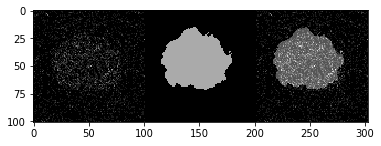

(101, 101) (101, 101) [0 1] 15


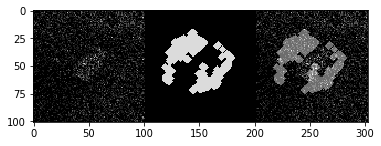

(101, 101) (101, 101) [0 1] 18


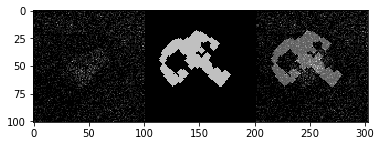

(101, 101) (101, 101) [0 1] 18


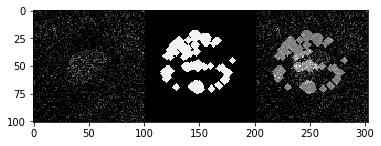

(101, 101) (101, 101) [0 1] 15


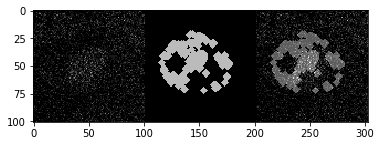

(101, 101) (101, 101) [0 1] 15


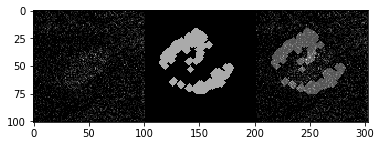

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_55
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_6
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_45
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_40
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_35
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_14
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_4
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_2
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_67
tut None
tut None
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_44
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_15
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_51
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_24
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_48
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_62
tut None
tut None
tut None
tut None
tut None
tut None
tut None
tut None
tut None
tut [[0 0 0 ... 0 0 0]
 [0 0 0 ...

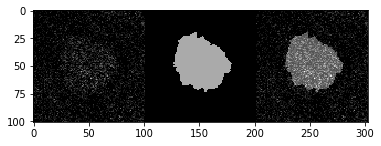

(101, 101) (101, 101) [0 1] 13


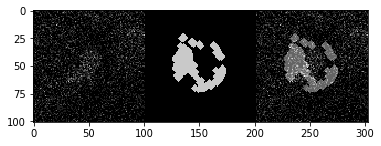

(101, 101) (101, 101) [0 1] 18


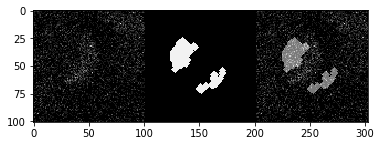

(101, 101) (101, 101) [0 1] 15


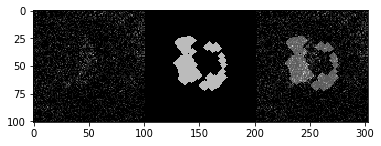

(101, 101) (101, 101) [0 1] 13


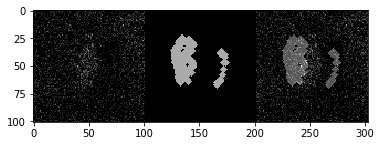

(101, 101) (101, 101) [0 1] 23


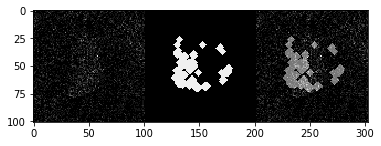

(101, 101) (101, 101) [0 1] 13


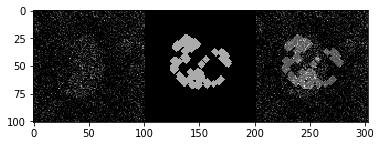

(101, 101) (101, 101) [0 1] 15


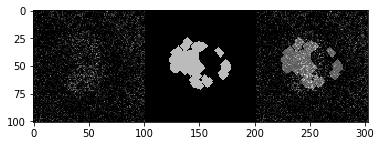

(101, 101) (101, 101) [0 1] 13


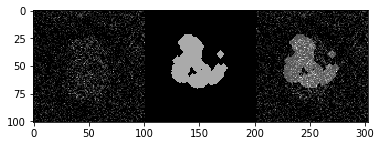

(101, 101) (101, 101) [0 1] 15


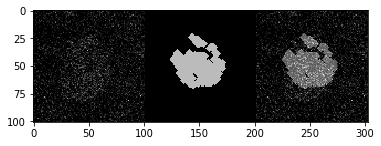

tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 15


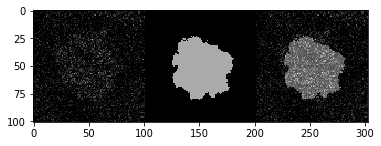

tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 15


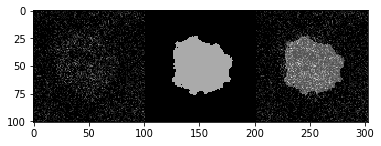

tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(98, 101) (98, 101) [0 1] 15


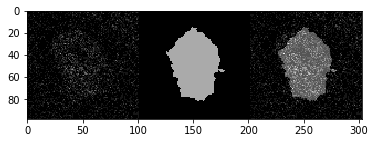

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_17
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_60
tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 18


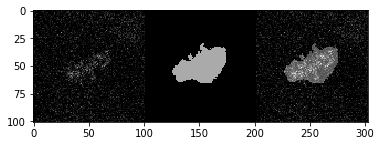

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_30
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_37
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_68
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_21
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_46
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_9
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_8
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_13
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_66
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_52
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_27
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_50
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_59
tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 88) (101, 88) [0 1] 13


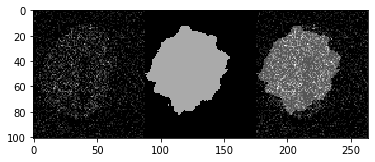

tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 82) (101, 82) [0 1] 18


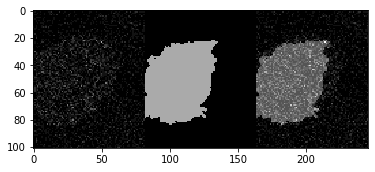

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_29
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_25
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_41
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_12
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_42
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_64
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_58
tut None
tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 23


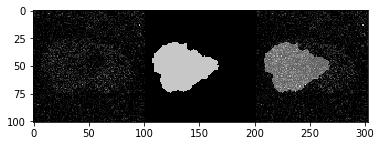

(101, 101) (101, 101) [0 1] 15


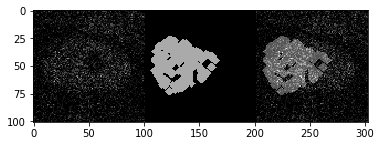

tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 15


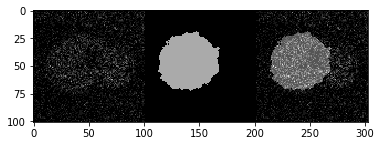

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_32
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_31
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_39
tut [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(101, 101) (101, 101) [0 1] 20


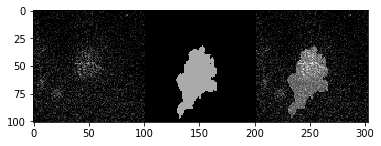

/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_36
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_54
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_28
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_49
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_43
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_22
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_20
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_38
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_19
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_5
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_56
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_34
/data/sim/CTC/data/CTC/images/Fluo-N2DH-GOWT1_02/track_53


In [113]:
from predict import ffRemap
folders = glob(data_path + '/*')
# os.makedirs(save_path, exist_ok=True)
   
for folder in folders:
    print(folder)
    mask_number = int(folder.split('_')[-1])
    images = glob(folder + '/*.tif')
    image_path = images[0].split('crop')[0]
    mask_path = image_path.replace(data_path, masks_path)
    nums = [int(im.split('crop')[-1].split('.')[0]) for im in images]
#     print(nums)
#     input()
    if len(nums) < 2:
        continue
#     else:
#         os.makedirs(save_path + folder.split('/')[-1], exist_ok=True)
    nearest_im = None
    nearest_mask = None
    masks_before = []
    
    
    for num in range(min(nums), max(nums)-1):
        image = cv2.imread(image_path + f'crop{num}.tif', -1)
        mask = cv2.imread(mask_path + f'crop{num+1}.tif', -1) == mask_number
        mask = mask.astype('uint8')
        if mask.sum() == 0:
            print('tut', nearest_mask)
            if nearest_mask is None:
                masks_before.append((num, image))
            else:
                mask = get_mask_fwd(image, nearest_im, nearest_mask)
#                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
#                 mask = cv2.dilate(opening, kernel, iterations=1)
                print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                plt.imshow(np.concatenate([image, mask*image.max(), image + 0.5*mask*image.max()], axis=1), cmap='gray')
                plt.pause(1)
#                 input()
        #         break
                for num, image in masks_before:
                    mask = get_mask_bcw(image, nearest_im, nearest_mask)
    #                 opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    #                 mask = cv2.dilate(opening, kernel, iterations=1)
                    print(mask.shape, nearest_mask.shape, np.unique(mask), image.max())
                    plt.imshow(np.concatenate([image, mask*image.max(), \
                                               image + 0.5*mask*image.max()], axis=1), cmap='gray')
                    plt.pause(1)
                    
                masks_before = []
    
        else:
            nearest_mask = mask
            nearest_im = image
#         break
        

